
# LIBRERIAS Y CARGAR DATOS

In [1]:
#Importamos librerias
import sqlite3
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Importat Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Crear conexión en memoria para evitar almacenar archivos innecesarios.
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

---
Creamos las tablas e insertamos los datos

---



In [4]:
#¡¡¡CAMBIAR LAS RUTAS CADA UNO A LAS SUYAS!!!
#Añadimos las rutas al archivo CSV en Google Drive de las tablas a añadir.
cloudiness = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/cloudiness.csv'
dates = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/dates_bueno.csv'
observations = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/observations.csv'
weather = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/weather.csv'
seasons = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/seasons.csv'

# ORIOL
# cloudiness = '/content/drive/MyDrive/Master/P3/Datos/cloudiness.csv'
# dates = '/content/drive/MyDrive/Master/P3/Datos/dates.csv'
# observations = '/content/drive/MyDrive/Master/P3/Datos/observations.csv'
# weather = '/content/drive/MyDrive/Master/P3/Datos/weather.csv'

#JOAN PAU
# cloudiness = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/cloudiness.csv'
# dates = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/dates_bueno.csv'
# observations = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/observations.csv'
# weather = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/weather.csv'
# seasons = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/seasons.csv'

In [5]:
#Tabla cloudiness
cursor.execute('''CREATE TABLE IF NOT EXISTS cloudiness (
  cloudiness_id INT PRIMARY KEY, cloudiness VARCHAR(50) NOT NULL )''')
#Tabla dates
cursor.execute('''CREATE TABLE IF NOT EXISTS dates (
  date_id INT PRIMARY KEY, date DATE NOT NULL )''')
#Tabla weather
cursor.execute('''CREATE TABLE IF NOT EXISTS weather (
  weather_id INT PRIMARY KEY, weather VARCHAR(50) NOT NULL )''')
#Tabla seasons
cursor.execute('''CREATE TABLE IF NOT EXISTS seasons (
  season_id INT PRIMARY KEY, season VARCHAR(50) NOT NULL )''')
#Tabla observations
cursor.execute('''CREATE TABLE IF NOT EXISTS observations (
  date_id INT, precipitation FLOAT, temp_max FLOAT, temp_min FLOAT,
  wind FLOAT, humidity FLOAT NOT NULL, pressure FLOAT NOT NULL, solar_radiation FLOAT NOT NULL, visibility FLOAT NOT NULL,
  weather_id INT, cloudiness_id INT, season_id INT, FOREIGN KEY (date_id) REFERENCES dates(date_id), FOREIGN KEY (weather_id) REFERENCES weather(weather_id),
  FOREIGN KEY (cloudiness_id) REFERENCES cloudiness(cloudiness_id), FOREIGN KEY (season_id) REFERENCES seasons(season_id))''')
cursor.execute('''DROP VIEW IF EXISTS weatherData; ''')
cursor.execute('''CREATE VIEW weatherData AS
  SELECT
      d.date AS observation_date,
      o.precipitation,
      o.temp_max,
      o.temp_min,
      o.wind,
      o.humidity,
      o.pressure,
      o.solar_radiation,
      o.visibility,
      w.weather AS weather_description,
      c.cloudiness AS cloudiness_description,
      s.season AS season_description
  FROM
      observations o
  INNER JOIN
      dates d ON o.date_id = d.date_id
  INNER JOIN
      weather w ON o.weather_id = w.weather_id
  INNER JOIN
      cloudiness c ON o.cloudiness_id = c.cloudiness_id
  INNER JOIN
      seasons s ON o.season_id = s.season_id;''')

---

Insert de los datos a las tablas

---

Tabla Dates

In [6]:
#Leer el archivo CSV de dates e insertar datos en la tabla.
with open(dates, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO dates (date_id, date)
            VALUES (?, ?)
        ''', (row['date_id'], row['date']))

In [7]:
# Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM dates')
dates = cursor.fetchall()

dates_df = pd.DataFrame(dates, columns=['date_id', 'date'])

# print("DATES:")
# for date in dates:
#      print(date)
print("DATES DataFrame")
print(dates_df)

DATES DataFrame
       date_id        date
0            1  2016-01-01
1            2  2016-01-02
2            3  2016-01-03
3            4  2016-01-04
4            5  2016-01-05
...        ...         ...
24995    24996  2084-06-07
24996    24997  2084-06-08
24997    24998  2084-06-09
24998    24999  2084-06-10
24999    25000  2084-06-11

[25000 rows x 2 columns]


In [8]:
#Revisamos en que columnas tenemos datos nulos y cuantos.
#Convertimos la lista a un dataframe
dates_df = pd.DataFrame(dates)
#Convertimos los datos vacíos en NAN
dates_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print(dates_df.isna().sum())

0    0
1    0
dtype: int64


Tabla Cloudiness

In [9]:
#Leer el archivo CSV de cloudiness e insertar datos en la tabla.
with open(cloudiness, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO cloudiness (cloudiness_id, cloudiness)
            VALUES (?, ?)
        ''', (row['cloudiness_id'], row['cloudiness']))

In [10]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM cloudiness')
cloudiness = cursor.fetchall()

cloudiness_df = pd.DataFrame(cloudiness, columns=['cloudiness_id', 'cloudiness'])

print("CLOUDINESS DataFrame")
print(cloudiness_df)

CLOUDINESS DataFrame
   cloudiness_id            cloudiness
0              1  parcialmente nublado
1              2              cubierto
2              3             despejado


Tabla Weather

In [11]:
#Leer el archivo CSV de weather e insertar datos en la tabla.
with open(weather, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO weather (weather_id, weather)
            VALUES (?, ?)
        ''', (row['weather_id'], row['weather']))

In [12]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM weather')
weather = cursor.fetchall()

weather_df = pd.DataFrame(weather, columns=['weather_id', 'weather'])

print("WEATHER DataFrame")
print(weather_df)

WEATHER DataFrame
   weather_id weather
0           1    rain
1           2   storm
2           3  cloudy
3           4     fog
4           5     sun


Tabla Seasons

In [13]:
#Leer el archivo CSV de seasons e insertar datos en la tabla.
with open(seasons, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO seasons (season_id, season)
            VALUES (?, ?)
        ''', (row['season_id'], row['season']))

In [14]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM seasons')
season = cursor.fetchall()

season_df = pd.DataFrame(season, columns=['season_id', 'season'])

print("SEASONS DataFrame")
print(season_df)

SEASONS DataFrame
   season_id  season
0          1  Winter
1          2  Spring
2          3  Summer
3          4  Autumn


Tabla Observations

In [15]:
#Leer el archivo CSV de observations e insertar datos en la tabla.
with open(observations, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO observations (date_id, precipitation, temp_max, temp_min, wind, humidity, pressure, solar_radiation,
            visibility, weather_id, cloudiness_id, season_id)
            VALUES (?,?, ?,?, ?,?, ?,?, ?,?, ?,?)
        ''', (row['date_id'],row['precipitation'], row['temp_max'],row['temp_min'], row['wind'],
              row['humidity'], row['pressure'],row['solar_radiation'], row['visibility'],row['weather_id'], row['cloudiness_id'], row['season_id']))

In [16]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM observations')
observations = cursor.fetchall()

observations_df = pd.DataFrame(observations, columns=['date_id', 'precipitation', 'temp_max', 'temp_min', 'wind',
                                                      'humidity','pressure','solar_radiation','visibility','weather_id','cloudiness_id','season_id'])

print("OBSERVATIONS DataFrame")
observations_df

OBSERVATIONS DataFrame


,date_id,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_id,cloudiness_id,season_id
0,1,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,1,1,1
1,2,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,2,1,1
2,3,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,1,1,1
3,4,11.73331,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,2,1,1
4,5,,,,,93.495408,1040.779759,1171.100262,5.274300,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,40.539998,27.00059,10.745337,6.187005,97.034881,1018.240400,817.076704,16.965235,1,2,3
24996,24997,3.103365,-1.402259,-3.582253,5.157118,73.123314,992.083538,688.916318,13.040280,3,1,3
24997,24998,48.640131,16.889725,11.122101,8.886248,78.533112,1026.385045,163.491340,9.445569,1,1,3
24998,24999,4.801455,4.875335,3.455625,4.452373,81.345812,985.643978,1150.032060,11.963065,3,2,3


In [17]:
query = "SELECT * FROM weatherData;"
weatherData = pd.read_sql(query, conn)

#Mostrar el DataFrame resultante
weatherData

,observation_date,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_description,cloudiness_description,season_description
0,2016-01-01,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,rain,parcialmente nublado,Winter
1,2016-01-02,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,storm,parcialmente nublado,Winter
2,2016-01-03,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,rain,parcialmente nublado,Winter
3,2016-01-04,11.73331,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,storm,parcialmente nublado,Winter
4,2016-01-05,,,,,93.495408,1040.779759,1171.100262,5.274300,cloudy,cubierto,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2084-06-07,40.539998,27.00059,10.745337,6.187005,97.034881,1018.240400,817.076704,16.965235,rain,cubierto,Summer
24996,2084-06-08,3.103365,-1.402259,-3.582253,5.157118,73.123314,992.083538,688.916318,13.040280,cloudy,parcialmente nublado,Summer
24997,2084-06-09,48.640131,16.889725,11.122101,8.886248,78.533112,1026.385045,163.491340,9.445569,rain,parcialmente nublado,Summer
24998,2084-06-10,4.801455,4.875335,3.455625,4.452373,81.345812,985.643978,1150.032060,11.963065,cloudy,cubierto,Summer


# Verificación de los datos



---
LIMPIEZA DE DATOS

---




Antes de empezar revisaremos quevariables contienen datos vacios o nulos.

In [18]:
weatherData.replace([''],np.nan,inplace=True)
weatherData.isnull().sum()

<ipython-input-18-730d57efab22>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherData.replace([''],np.nan,inplace=True)


,0
observation_date,0
precipitation,2500
temp_max,2500
temp_min,2500
wind,2500
humidity,0
pressure,0
solar_radiation,0
visibility,0
weather_description,0


Calcularemos la asimetría de cada una de estas variables para así poder decidir como tratar los datos.

In [19]:
#CALCULAMOS ASIMETRIA

#Replace empty strings with NaN and then convert to numeric
weatherData['temp_max'] = pd.to_numeric(weatherData['temp_max'].replace('', pd.NA), errors='coerce')
weatherData['temp_min'] = pd.to_numeric(weatherData['temp_min'].replace('', pd.NA), errors='coerce')
weatherData['precipitation'] = pd.to_numeric(weatherData['precipitation'].replace('', pd.NA), errors='coerce')
weatherData['wind'] = pd.to_numeric(weatherData['wind'].replace('', pd.NA), errors='coerce')

print("Temp max: ",weatherData['temp_max'].skew())
print("Temp min: ",weatherData['temp_min'].skew())
print("Precipitation: ",weatherData['precipitation'].skew())
print("Wind: ",weatherData['wind'].skew())

Temp max:  0.01565498115123896
Temp min:  0.35624294459072764
Precipitation:  -0.006524854357106263
Wind:  0.013807893828540226


---
* |Asimetría| < 0,5 : Se considera bastante simétrico.
* 0,5 < |Asimetría| < 1 : Moderadamente asimétrica.
* |Asimetría| > 1 : Altamente sesgado, lo que indica que las transformaciones (por ejemplo, logaritmo o raíz cuadrada) pueden ayudar a normalizar.
---

Podemos concluir que **todas las variables** tienen una **distribución simétrica o casi simétrica**.

Tenemos 2500 valores nulos de 25000 datos (10%)

---
*   **Eliminar los nulos**, aunque simplifica el proceso, **no** es la mejor opción ya que tenemos una **cantidad considerable** de datos nulos.
*   **Imputar los nulos con la media**, es una **buena** opción ya que las mayoría de las **distribuciones son simétricas** y **no debería sesgar** demasiado los datos.
* **Limpiar y Normalizar los datos**, es la **mejor** opción para que todas las variables tengan un **rango similar**. Esto implica, **imputar** los **nulos** y luego **normalizar**. (Estandarización (Z-score), escalado max-min)
---

Vemos que lo mejor que podemos hacer es imputar los nulos con la media.

---


Imputación de valores faltantes con la media

---



In [20]:
# Crear una copia del DataFrame original
weatherData_cleaned = weatherData.copy()

# Lista de columnas para las que se imputará la media
columnas_a_imputar = ['temp_max', 'temp_min', 'wind', 'precipitation']

# Iterar sobre cada columna, convertir a numérico, calcular la media e imputar
for columna in columnas_a_imputar:
    # Convertir a numérico, manejando valores no válidos como NaN
    weatherData_cleaned[columna] = pd.to_numeric(weatherData_cleaned[columna], errors='coerce')

    # Calcular la media, ignorando los NaN
    media_columna = weatherData_cleaned[columna].mean()
    print(f"Media calculada para {columna}: {media_columna}")

    # Imputar los valores nulos con la media
    weatherData_cleaned[columna].fillna(media_columna, inplace=True)

Media calculada para temp_max: 16.892393173582324
Media calculada para temp_min: 3.580655338596054
Media calculada para wind: 4.931800815971483
Media calculada para precipitation: 28.093320743142307


<ipython-input-20-db4e3cd880a2>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weatherData_cleaned[columna].fillna(media_columna, inplace=True)


In [21]:
weatherData_cleaned

,observation_date,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_description,cloudiness_description,season_description
0,2016-01-01,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,rain,parcialmente nublado,Winter
1,2016-01-02,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,storm,parcialmente nublado,Winter
2,2016-01-03,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,rain,parcialmente nublado,Winter
3,2016-01-04,11.733310,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,storm,parcialmente nublado,Winter
4,2016-01-05,28.093321,16.892393,3.580655,4.931801,93.495408,1040.779759,1171.100262,5.274300,cloudy,cubierto,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2084-06-07,40.539998,27.000590,10.745337,6.187005,97.034881,1018.240400,817.076704,16.965235,rain,cubierto,Summer
24996,2084-06-08,3.103365,-1.402259,-3.582253,5.157118,73.123314,992.083538,688.916318,13.040280,cloudy,parcialmente nublado,Summer
24997,2084-06-09,48.640131,16.889725,11.122101,8.886248,78.533112,1026.385045,163.491340,9.445569,rain,parcialmente nublado,Summer
24998,2084-06-10,4.801455,4.875335,3.455625,4.452373,81.345812,985.643978,1150.032060,11.963065,cloudy,cubierto,Summer


In [22]:
#Revisamos si efectivamente se han eliminado los valores nulos.
print(weatherData_cleaned.isna().sum())

observation_date          0
precipitation             0
temp_max                  0
temp_min                  0
wind                      0
humidity                  0
pressure                  0
solar_radiation           0
visibility                0
weather_description       0
cloudiness_description    0
season_description        0
dtype: int64


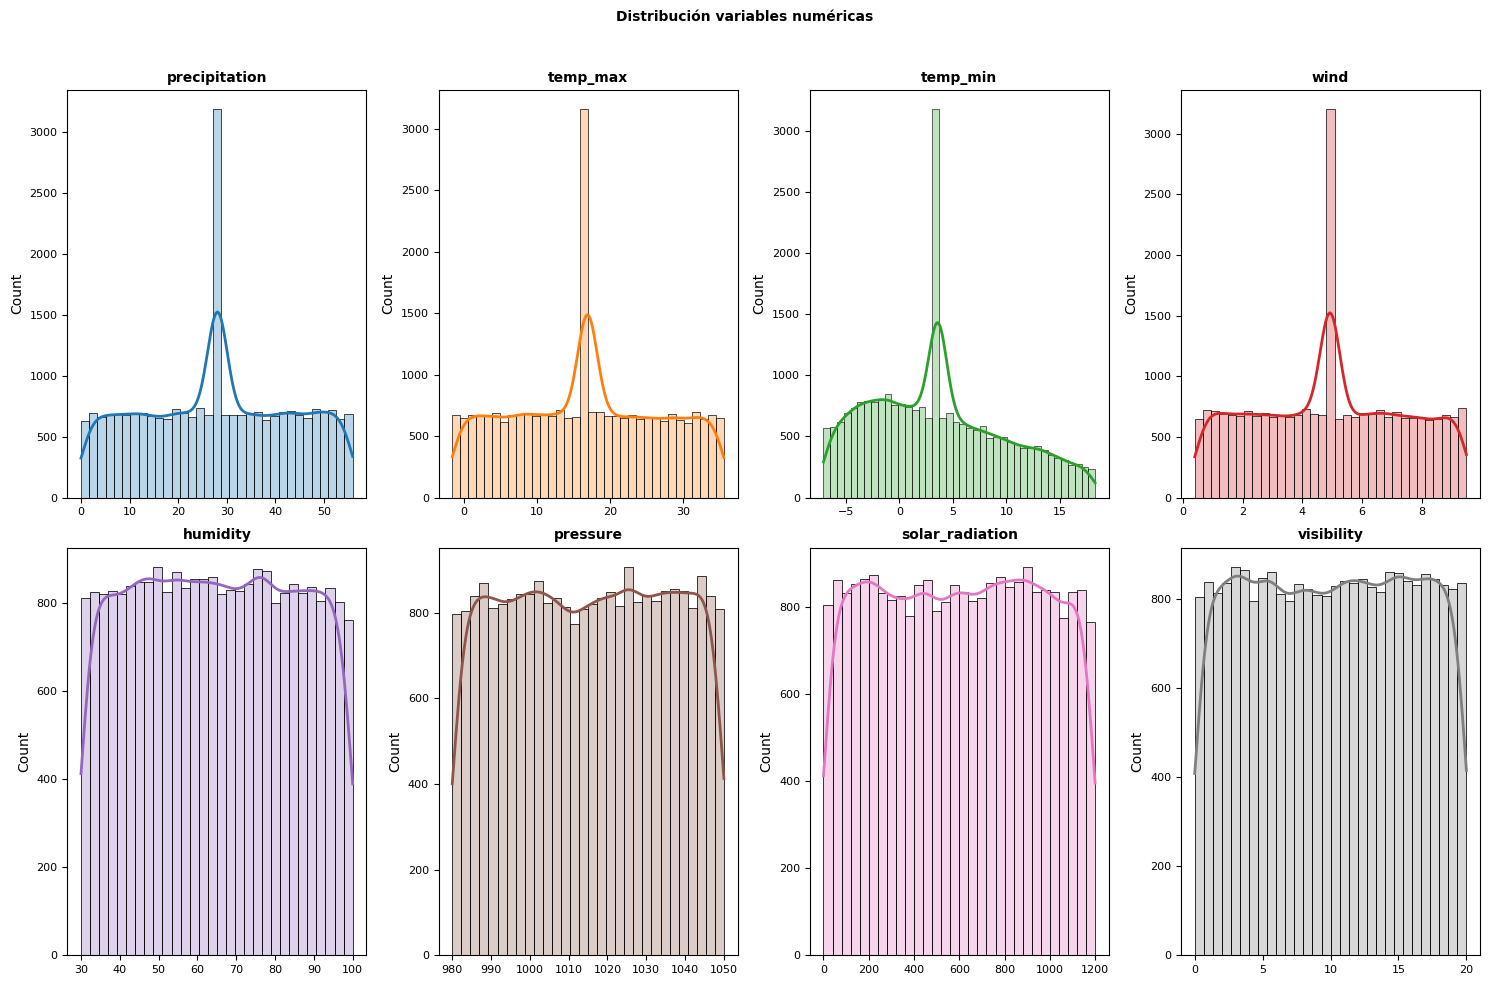

In [23]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = weatherData_cleaned.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = weatherData_cleaned,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

---
Normalización y transformación

---



In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

weatherData_cleaned_normalized = weatherData_cleaned.copy()

# Precipitation: Log transform and then Min-Max scale
weatherData_cleaned_normalized['precipitation'] = np.log1p(weatherData_cleaned_normalized['precipitation'])

# Wind: Square root transform to reduce high variance effects, then scale
weatherData_cleaned_normalized['wind'] = np.sqrt(weatherData_cleaned_normalized['wind'])

# Normalization with Min-Max Scaling for relevant columns
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['temp_max', 'temp_min', 'precipitation', 'wind']
weatherData_cleaned_normalized[columns_to_normalize] = scaler.fit_transform(weatherData_cleaned_normalized[columns_to_normalize])
weatherData_cleaned_normalized
# Show the summary statistics of the cleaned data
weatherData_cleaned_normalized[columns_to_normalize].describe()

,temp_max,temp_min,precipitation,wind
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.497122,0.420459,0.778948,0.612188
std,0.272907,0.248287,0.195149,0.253493
min,0.000000,0.000000,0.000000,0.000000
25%,0.276552,0.221942,0.696589,0.437180
50%,0.497122,0.420459,0.833931,0.648349
75%,0.716804,0.588774,0.922420,0.816774
max,1.000000,1.000000,1.000000,1.000000


In [25]:
weatherData_cleaned_normalized

,observation_date,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_description,cloudiness_description,season_description
0,2016-01-01,0.945192,0.704954,0.838392,0.769908,72.164838,1047.159266,355.719260,2.554031,rain,parcialmente nublado,Winter
1,2016-01-02,0.930689,0.188834,0.466662,0.314031,61.847605,1015.712275,320.128520,16.960026,storm,parcialmente nublado,Winter
2,2016-01-03,0.919120,0.167363,0.387859,0.916359,70.867155,1032.346048,206.294226,5.264422,rain,parcialmente nublado,Winter
3,2016-01-04,0.629355,0.954359,0.893163,0.595056,82.692741,1018.328973,340.829562,1.650444,storm,parcialmente nublado,Winter
4,2016-01-05,0.833931,0.497122,0.420459,0.648349,93.495408,1040.779759,1171.100262,5.274300,cloudy,cubierto,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2084-06-07,0.922107,0.768862,0.702569,0.757182,97.034881,1018.240400,817.076704,16.965235,rain,cubierto,Summer
24996,2084-06-08,0.348987,0.005304,0.138419,0.668826,73.123314,992.083538,688.916318,13.040280,cloudy,parcialmente nublado,Summer
24997,2084-06-09,0.966213,0.497050,0.717404,0.958685,78.533112,1026.385045,163.491340,9.445569,rain,parcialmente nublado,Summer
24998,2084-06-10,0.434726,0.174065,0.415536,0.603158,81.345812,985.643978,1150.032060,11.963065,cloudy,cubierto,Summer


In [26]:
# Diccionarios para mapear los valores
cloudiness_map = {
    "parcialmente nublado": 1,
    "cubierto": 2,
    "despejado": 3
}

weather_map = {
    "rain": 1,
    "storm": 2,
    "cloudy": 3,
    "fog": 4,
    "sun": 5
}

season_map = {
    "Winter": 1,
    "Spring": 2,
    "Summer": 3,
    "Autumn": 4
}

# Aplicar mapeos en el dataframe
weatherData_cleaned_normalized['cloudiness_id'] = weatherData_cleaned_normalized['cloudiness_description'].map(cloudiness_map)
weatherData_cleaned_normalized['weather_id'] = weatherData_cleaned_normalized['weather_description'].map(weather_map)
weatherData_cleaned_normalized['season_id'] = weatherData_cleaned_normalized['season_description'].map(season_map)

# Eliminar columnas categóricas originales (opcional)
weatherData_cleaned_normalized = weatherData_cleaned_normalized.drop(columns=['cloudiness_description', 'weather_description', 'season_description'])

In [27]:
weatherData_cleaned_normalized

,observation_date,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,cloudiness_id,weather_id,season_id
0,2016-01-01,0.945192,0.704954,0.838392,0.769908,72.164838,1047.159266,355.719260,2.554031,1,1,1
1,2016-01-02,0.930689,0.188834,0.466662,0.314031,61.847605,1015.712275,320.128520,16.960026,1,2,1
2,2016-01-03,0.919120,0.167363,0.387859,0.916359,70.867155,1032.346048,206.294226,5.264422,1,1,1
3,2016-01-04,0.629355,0.954359,0.893163,0.595056,82.692741,1018.328973,340.829562,1.650444,1,2,1
4,2016-01-05,0.833931,0.497122,0.420459,0.648349,93.495408,1040.779759,1171.100262,5.274300,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2084-06-07,0.922107,0.768862,0.702569,0.757182,97.034881,1018.240400,817.076704,16.965235,2,1,3
24996,2084-06-08,0.348987,0.005304,0.138419,0.668826,73.123314,992.083538,688.916318,13.040280,1,3,3
24997,2084-06-09,0.966213,0.497050,0.717404,0.958685,78.533112,1026.385045,163.491340,9.445569,1,1,3
24998,2084-06-10,0.434726,0.174065,0.415536,0.603158,81.345812,985.643978,1150.032060,11.963065,2,3,3


Descargamos el nuevo dataframe con los datos limpios.

In [28]:
weatherData_cleaned_normalized.to_csv('obsevations_cleaned.csv', index=False)

# Preparación de los datos

Para ver cuales son las variables mas importantes y útiles para entrenar el model utilizamos Kbeast por puntaje y orden.

In [29]:
# 1. Definir variables dependientes e independientes para la regresión
X = weatherData_cleaned_normalized[['temp_max', 'temp_min', 'wind', 'humidity', 'pressure', 'solar_radiation', 'visibility', 'precipitation', 'cloudiness_id', 'season_id']]
y = weatherData_cleaned_normalized['weather_id']

In [30]:
features = X
target = y

# UnderSampling

# RandomUnderSampler
undersampling = RandomUnderSampler(random_state=42)
features_under, target_under = undersampling.fit_resample(features, target)

# Resultados submuestreo
counter_under = Counter(target_under)
print("Después del submuestreo con RandomUnderSampler:")
for clase, cantidad in counter_under.items():
    print(f"Clase {clase}: {cantidad}")

# NearMiss
nm = NearMiss()
features_under_nm, target_under_nm = nm.fit_resample(features, target)

# Resultados NearMiss
counter_under_nm = Counter(target_under_nm)
print("\nDespués del submuestreo con NearMiss:")
for clase, cantidad in counter_under_nm.items():
    print(f"Clase {clase}: {cantidad}")

# OverSampling

# RandomOverSampler
oversampling = RandomOverSampler(sampling_strategy='minority', random_state=42)
features_over, target_over = oversampling.fit_resample(features, target)

# Resultados RandomOverSampler
counter_over = Counter(target_over)
print("\nDespués del sobremuestreo con RandomOverSampler:")
for clase, cantidad in counter_over.items():
    print(f"Clase {clase}: {cantidad}")

# SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
features_smote, target_smote = smote.fit_resample(features, target)

# Resultados SMOTE
counter_smote = Counter(target_smote)
print("\nDespués del sobremuestreo con SMOTE:")
for clase, cantidad in counter_smote.items():
    print(f"Clase {clase}: {cantidad}")

Después del submuestreo con RandomUnderSampler:
Clase 1: 110
Clase 2: 110
Clase 3: 110
Clase 4: 110
Clase 5: 110

Después del submuestreo con NearMiss:
Clase 1: 110
Clase 2: 110
Clase 3: 110
Clase 4: 110
Clase 5: 110

Después del sobremuestreo con RandomOverSampler:
Clase 1: 9084
Clase 2: 9468
Clase 3: 5897
Clase 4: 441
Clase 5: 9468

Después del sobremuestreo con SMOTE:
Clase 1: 9084
Clase 2: 9468
Clase 3: 5897
Clase 4: 441
Clase 5: 9468


In [31]:
# Aplicar SelectKBest con chi2
features_selected_chi = SelectKBest(score_func=chi2, k=5).fit(X, y)

# Mostrar el objeto selector
print(features_selected_chi)
print(' ')

# Obtener la máscara de las mejores características
k_best_feature_mask = features_selected_chi.get_support()
print("Máscara de las mejores características:\n", k_best_feature_mask)
print(' ')

# Obtener los nombres de las mejores características
best_features_chi2 = list(X.columns[k_best_feature_mask])
print('10 Mejores características basadas en chi-cuadrado:', best_features_chi2)


SelectKBest(k=5, score_func=<function chi2 at 0x7a2c73aeff60>)
 
Máscara de las mejores características:
 [False False  True  True False  True  True  True False False]
 
10 Mejores características basadas en chi-cuadrado: ['wind', 'humidity', 'solar_radiation', 'visibility', 'precipitation']


In [32]:
# Selección basada en pruebas estadísticas
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Mostrar puntajes
scores = pd.Series(selector.scores_, index=X.columns)
print("Puntajes de selección de características:\n", scores.sort_values(ascending=False))

Puntajes de selección de características:
 wind               8635.696599
precipitation      4352.999402
visibility          200.884777
humidity            193.743660
temp_max             48.409884
cloudiness_id         5.365874
temp_min              2.131993
season_id             1.237495
pressure              0.743125
solar_radiation       0.722561
dtype: float64


In [33]:
# ANOVA (Analysis of Varience) F-Value
features_select_f = SelectKBest(score_func=f_classif,k=5).fit(X, y)
best_feature_annova_f_value = list(X.columns[features_select_f.get_support()])
print('10 Best features based on ANOVA F-value:', best_feature_annova_f_value)

10 Best features based on ANOVA F-value: ['temp_max', 'wind', 'humidity', 'visibility', 'precipitation']


In [34]:
# Combinar X e y en un solo DataFrame
data = weatherData_cleaned_normalized.copy()

# Drop the 'observation_date' column before calculating correlations
data = data.drop(columns=['observation_date'])

# Calcular la correlación por pares
correlaciones = data.corr()['weather_id'].sort_values(ascending=False)

# Seleccionar las 10 mejores características, excluyendo la correlación de weather_id consigo mismo
best_features_corr = correlaciones.index[1:6].tolist()

print('10 Mejores características basadas en correlación por pares:', best_features_corr)


10 Mejores características basadas en correlación por pares: ['humidity', 'temp_max', 'solar_radiation', 'cloudiness_id', 'season_id']


In [35]:
selected_features = list(set(best_features_chi2+best_feature_annova_f_value+best_features_corr))
print('List of all features from chi2, f-value and corr', selected_features)
print('Number of features in the concatenated list', len(selected_features))

List of all features from chi2, f-value and corr ['cloudiness_id', 'precipitation', 'humidity', 'season_id', 'visibility', 'wind', 'temp_max', 'solar_radiation']
Number of features in the concatenated list 8


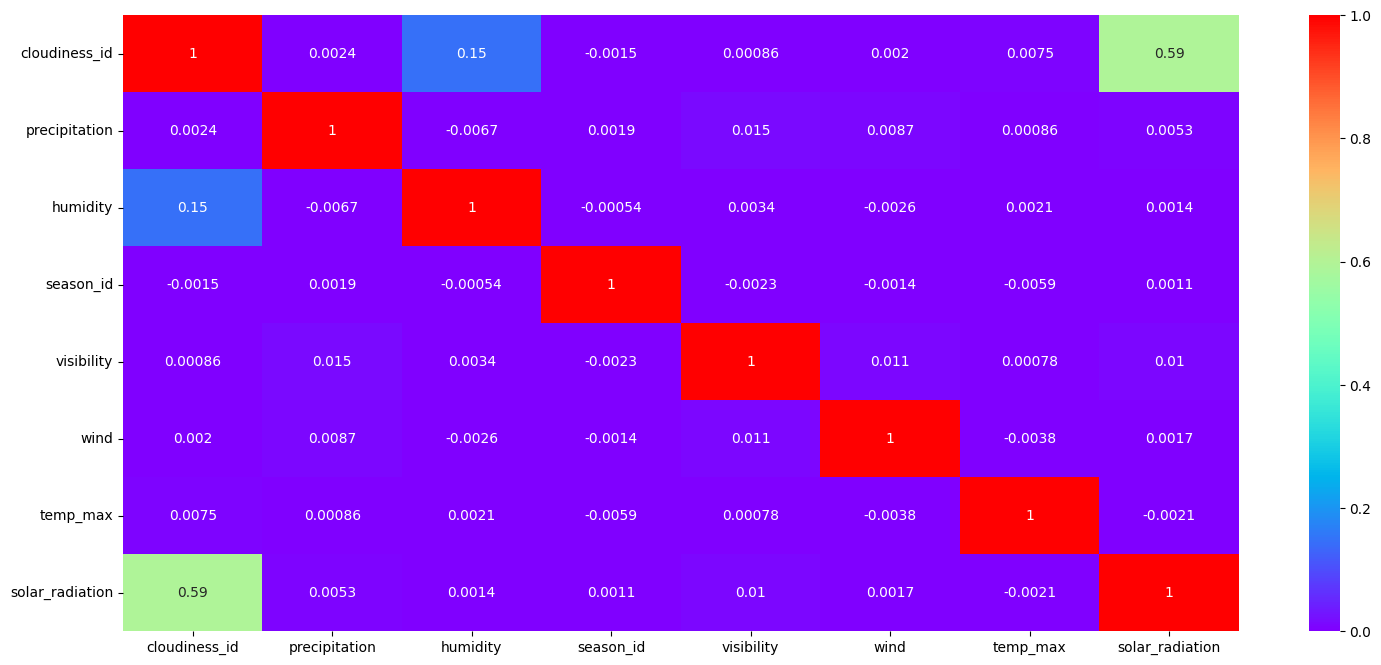

In [36]:
#Correlación
plt.figure(figsize=(18,8))
corr =weatherData_cleaned_normalized[selected_features].corr()
sns.heatmap(corr,annot=True,vmin=0,vmax=1,cmap='rainbow');

In [37]:
X = weatherData_cleaned_normalized[selected_features]
y = weatherData_cleaned_normalized['weather_id']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifica si hay valores faltantes y manéjalos
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17500, 8)
(7500, 8)
(17500,)
(7500,)


<ipython-input-38-dac4fe2301d3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="bright")


<Axes: xlabel='weather_id', ylabel='count'>

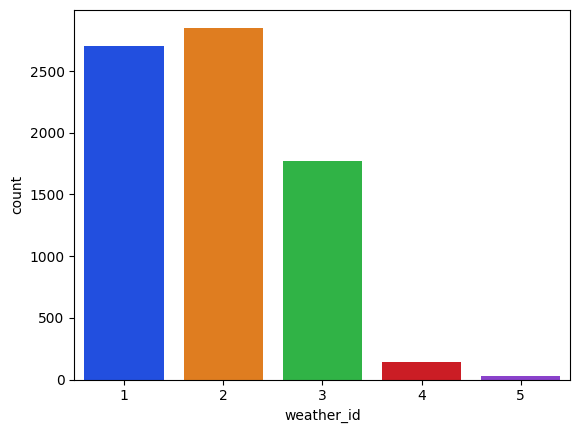

In [38]:
sns.countplot(x=y_test, palette="bright")

In [40]:
#FEATURE SCALING
# Excluimos las variables 'cloudiness_id' and 'season_id'
scaler = MinMaxScaler()
numerical_features = ['solar_radiation', 'wind', 'visibility', 'temp_max', 'precipitation', 'humidity']

X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_std[numerical_features] = scaler.transform(X_test[numerical_features])

In [41]:
#Reiniciar el indice
X_train_std.reset_index(drop=True, inplace=True)
X_test_std.reset_index(drop=True, inplace=True)

X_train_std

,cloudiness_id,precipitation,humidity,season_id,visibility,wind,temp_max,solar_radiation
0,1,0.877906,0.521172,3,0.202249,0.923093,0.983715,0.204287
1,2,0.780796,0.373589,3,0.577739,0.863055,0.740827,0.928256
2,1,0.912617,0.089378,2,0.766157,0.810687,0.634852,0.426436
3,1,0.998198,0.652486,3,0.706856,0.944479,0.507192,0.517923
4,3,0.474521,0.684179,1,0.527809,0.160393,0.812584,0.401363
...,...,...,...,...,...,...,...,...
17495,1,0.770353,0.943632,1,0.561549,0.027713,0.054852,0.012841
17496,2,0.873815,0.225910,4,0.635207,0.878617,0.776229,0.810232
17497,1,0.987596,0.886430,2,0.255769,0.975468,0.595736,0.400323
17498,1,0.951711,0.578403,2,0.261375,0.959375,0.791962,0.043457


# Modelación y Evaluación

In [42]:
# Crear el modelo SVM 01
svm_model1 = SVC(class_weight='balanced', kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model1.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred1 = svm_model1.predict(X_test)

In [43]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred1))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.41      0.02      0.04      2704
           2       0.39      0.22      0.28      2852
           3       0.26      0.15      0.19      1773
           4       0.07      1.00      0.12       142
           5       0.00      0.41      0.01        29

    accuracy                           0.15      7500
   macro avg       0.23      0.36      0.13      7500
weighted avg       0.36      0.15      0.17      7500

Accuracy: 0.1468


In [44]:
# Crear el modelo SVM 01 MAXMINSCALER
svm_model1M = SVC(class_weight='balanced', kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model1M.fit(X_train_std, y_train)

# Predecir en el conjunto de prueba
y_pred1M = svm_model1M.predict(X_test_std)

In [45]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred1M))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1M)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.97      0.81      0.88      2704
           2       0.97      0.79      0.87      2852
           3       0.64      0.82      0.72      1773
           4       0.27      0.98      0.43       142
           5       0.26      0.97      0.41        29

    accuracy                           0.81      7500
   macro avg       0.62      0.87      0.66      7500
weighted avg       0.88      0.81      0.83      7500

Accuracy: 0.8101333333333334


In [46]:
# Crear el modelo SVM 02
svm_model3 = SVC(kernel='rbf', C=10, gamma=2, tol=0.01)

# Entrenar el modelo
svm_model3.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred3 = svm_model3.predict(X_test)

In [47]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred3))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.39      0.01      0.02      2704
           2       0.38      0.99      0.55      2852
           3       0.50      0.00      0.01      1773
           4       0.00      0.00      0.00       142
           5       0.00      0.00      0.00        29

    accuracy                           0.38      7500
   macro avg       0.25      0.20      0.12      7500
weighted avg       0.40      0.38      0.22      7500

Accuracy: 0.38093333333333335


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# Crear el modelo SVM 02 MAXMINSCALER
svm_model2 = SVC(class_weight='balanced', kernel='rbf', C=0.1, gamma=0.04)

# Entrenar el modelo
svm_model2.fit(X_train_std, y_train)

# Predecir en el conjunto de prueba
y_pred2 = svm_model2.predict(X_test_std)

In [49]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred2))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.73      0.85      0.78      2704
           2       0.96      0.78      0.86      2852
           3       0.71      0.31      0.43      1773
           4       0.13      0.97      0.23       142
           5       0.11      1.00      0.20        29

    accuracy                           0.70      7500
   macro avg       0.53      0.78      0.50      7500
weighted avg       0.80      0.70      0.72      7500

Accuracy: 0.6958666666666666


In [50]:
# Crear el modelo SVM 04 Linear
svm_model4 = SVC(kernel='rbf', C=0.01,gamma=1)

# Entrenar el modelo
svm_model4.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred4 = svm_model4.predict(X_test)

In [51]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred4))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2704
           2       0.38      1.00      0.55      2852
           3       0.00      0.00      0.00      1773
           4       0.00      0.00      0.00       142
           5       0.00      0.00      0.00        29

    accuracy                           0.38      7500
   macro avg       0.08      0.20      0.11      7500
weighted avg       0.14      0.38      0.21      7500

Accuracy: 0.38026666666666664


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# Crear el modelo SVM 05 Lineal
svm_model5 = SVC(kernel='linear', C=1)

# Entrenar el modelo
svm_model5.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred5 = svm_model5.predict(X_test)

In [53]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred5))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.96      0.89      0.92      2704
           2       0.94      0.86      0.90      2852
           3       0.68      0.88      0.77      1773
           4       0.71      0.48      0.57       142
           5       1.00      0.38      0.55        29

    accuracy                           0.87      7500
   macro avg       0.86      0.70      0.74      7500
weighted avg       0.88      0.87      0.87      7500

Accuracy: 0.8656


Para que el modelo sea el más preciso posible, estudiaremos cuales son las mejores variables de C, Gamma y Kernel.

In [46]:
from sklearn.model_selection import GridSearchCV

# Espacio de búsqueda

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 'scale'],
    'kernel': ['rbf', 'poly', 'linear']
}

# Ajuste con validación cruzada
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_std, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)

# Modelo final
# Resultados
print("Mejor puntaje F1 ponderado:", grid_search.best_score_)
best_svm = grid_search.best_estimator_
print("Mejor modelo:", best_svm)

Mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Mejor puntaje F1 ponderado: 0.8832617816720134
Mejor modelo: SVC(C=10, class_weight='balanced', kernel='poly', random_state=42)


In [52]:
# Crear el modelo SVM 01 MAXMINSCALER 3
svm_model1M3 = SVC(class_weight='balanced', kernel='poly', C=10, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model1M3.fit(X_train_std, y_train)

# Predecir en el conjunto de prueba
# y_pred1M3 = svm_model1M3.predict(X_test_std)
nuevo_dato = np.array([[0.204287, 0.923093,	0.202249, 0.983715,	1, 0.877906, 0.521172, 1]])
prediccion = svm_model1M3.predict(nuevo_dato)
print(f"La clase predicha es: {prediccion[0]}")

La clase predicha es: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred1M3))

#Ver acuraccy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1M3)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.97      0.89      0.93      2704
           2       0.97      0.85      0.91      2852
           3       0.74      0.88      0.80      1773
           4       0.38      0.93      0.54       142
           5       0.39      0.90      0.55        29

    accuracy                           0.87      7500
   macro avg       0.69      0.89      0.75      7500
weighted avg       0.90      0.87      0.88      7500

Accuracy: 0.8741333333333333


In [53]:
import joblib
from google.colab import files

# Guardar el modelo en un archivo
joblib.dump(svm_model1M3, 'svm_model1M3.pkl')

['svm_model1M3.pkl']

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(y_test, y_pred1M2)
print("Error Absoluto Medio (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred1M2)
print("Error Cuadrático Medio (MSE):", mse)

Error Absoluto Medio (MAE): 0.2028
Error Cuadrático Medio (MSE): 0.37693333333333334


---

Joan Pau Grau Homs

Oriol Fernández Font

Aakriti Guerrero Bertolin

---

